In [ ]:
projectpath = '/content/drive/MyDrive/Uni logos/'
savepath = '/content/drive/MyDrive/Uni logos/imgs/'

In [ ]:
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
url = 'https://www.shanghairanking.com/rankings/arwu/2021'
response = requests.get(url)

In [ ]:
soup = BeautifulSoup(response.text, 'lxml')

In [ ]:
soup

<!DOCTYPE html>
<html lang="en">
<head><script>!function(t){function c(){c.q.push(arguments)}t.TeaAnalyticsObject="collectEvent",t.collectEvent||(c.q=c.q||[],t.collectEvent=c),t.collectEvent.l=+new Date}(window)</script>
<script async="" src="https://sf1-scmcdn-tos.pstatp.com/goofy/log-sdk/collect/collect-autotrack-rangers.js"></script>
<script>window.collectEvent("init",{app_id:237653,channel:"cn",log:!0,autotrack:!1}),window.collectEvent("start")</script>
<title>ShanghaiRanking's Academic Ranking of World Universities</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width,initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="IE=edge" data-n-head="ssr" http-equiv="X-UA-Compatible"/><link data-n-head="ssr" href="/favicon.ico" rel="icon" type="image/x-icon"/><link as="script" href="/_nuxt/040b440.js" rel="preload"/><link as="script" href="/_nuxt/0c576a9.js" rel="preload"/><link as="script" href="/_nuxt/fad100f.js" rel="preload"/><link as="script" 

In [ ]:
img_page = soup.select('.univ-logo')

In [ ]:
img_page

[<img alt="Harvard University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/032bd1b77.png"/>,
 <img alt="Stanford University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/13de8913b.png"/>,
 <img alt="University of Cambridge" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/8d9861b69.png"/>,
 <img alt="Massachusetts Institute of Technology (MIT)" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/79165fd8b.png"/>,
 <img alt="University of California, Berkeley" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/0ff179fb8.png"/>,
 <img alt="Princeton University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/b1dad5288.png"/>,
 <img alt="University of Oxford" class="univ-logo" data-v-ae1ab

In [ ]:
page[i]['src']

Object `[i][src]` not found


In [ ]:
rank = []
for i in range(30):
  uniname = img_page[i]['alt']
  rank.append(uniname)
  imagelink = requests.get('https://www.shanghairanking.com'+img_page[i]['src'])
  f = open(f'{savepath}{uniname}.png','wb')
  f.write(imagelink.content)
  f.close()

In [ ]:
rank_df = pd.DataFrame({'Rank': range(1, 1+len(rank)), 'University': rank})
rank_df.to_excel(projectpath+'uni ranking.xlsx', index=False)
rank_df

,Rank,University
0,1,Harvard University
1,2,Stanford University
2,3,University of Cambridge
3,4,Massachusetts Institute of Technology (MIT)
4,5,"University of California, Berkeley"
5,6,Princeton University
6,7,University of Oxford
7,8,Columbia University
8,9,California Institute of Technology
9,10,University of Chicago


In [ ]:
import cv2
from PIL import Image

In [ ]:
im=cv2.imread('/content/drive/MyDrive/Uni logos/imgs/California Institute of Technology.png')

<function matplotlib.pyplot.show>

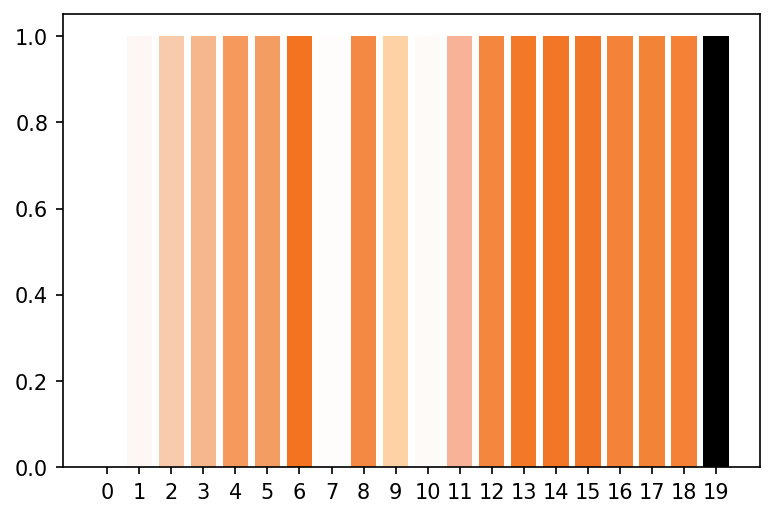

In [ ]:
im=Image.open('/content/drive/MyDrive/Uni logos/imgs/California Institute of Technology.png')
 
# 要提取的主要颜色数量
num_colors = 20 
small_image = im.resize((80, 80))
result = small_image.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
result = result.convert('RGB')
main_colors = result.getcolors()

col_extract = []
# 显示提取的主要颜色
for count, col in main_colors:
    #print([col[i]/255 for i in range(3)])#RGB转RGBA，可输出RGBA色号
    col_extract.append([col[i]/255 for i in range(3)])

#使用提取的颜色绘制条形图
plt.figure(dpi=150)
plt.bar(range(len(col_extract)),np.ones(len(col_extract)),color=(col_extract))  
plt.xticks(range(len(col_extract)), (range(len(col_extract))))
plt.show


# Processing

In [3]:
import pandas as pd